In [11]:
import matplotlib.pyplot as plt
import matplotlib.path as pltpath
import itertools
import math
import functools

№1

In [12]:

def draw_a_sequence_of_shapes(axis, sequence):
    for i in sequence:
        x, y = zip(*i)
        axis.plot(x + (x[0],), y + (y[0],), color = 'black')
    

№2

In [13]:

def gen_rectangle(space_in_between = 0.1):
    count = 0
    while True: 
        yield ((0 + count + count * space_in_between + 0.5 * count, 0), (1.5 + count + count * space_in_between + 0.5 * count, 0), 
               (1.5 + count + count * space_in_between + 0.5 * count, 1), (0 + count + count * space_in_between + 0.5 * count, 1))
        count += 1

def gen_triangle(space_in_between = 0.1):
    count = 0
    while True: 
        yield ((0 + count + count * space_in_between, 0), (1 + count + count * space_in_between, 0), 
               (0.5 + count + count * space_in_between, 1))
        count += 1

def gen_hexagon(space_in_between = 0.1):
    count = 0
    while True:
        yield ((0 + count + count * space_in_between, 0.25), (0.5 + count + count * space_in_between, 0), 
               (1 + count + count * space_in_between, 0.25), (1 + count + count * space_in_between, 0.75),
                 (0.5 + count + count * space_in_between, 1), (0 + count + count * space_in_between, 0.75))
        count += 1

def gen_concave_pentagon(space_in_between = 0.1):
    count = 0
    while True:
        yield ((0.15 + count + count * space_in_between, 0), (0.85 + count + count * space_in_between, 0), (1 + count + count * space_in_between, 0.85), 
               (0.5 + count + count * space_in_between, 0.5), (0 + count + count * space_in_between, 0.85))
        count += 1



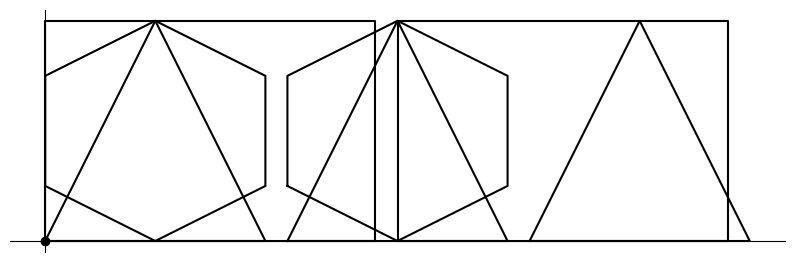

In [14]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.scatter(0, 0, color = 'black')

draw_a_sequence_of_shapes(ax, itertools.chain(itertools.islice(gen_hexagon(), 2), itertools.islice(gen_rectangle(), 2), itertools.islice(gen_triangle(), 3)))

ax.set_aspect('equal')
plt.show()

№3

In [15]:

def get_directional_vector(angle):
    return (math.cos(math.radians(angle)), math.sin(math.radians(angle)))

In [16]:

def tr_translate(polygon, direction, distance):
    translated_poly = []
    for vertice in polygon:
        translated_poly.append((vertice[0] + (direction[0] * distance), vertice[1] + (direction[1] * distance)))
    return tuple(translated_poly)


In [17]:

def tr_rotate(polygon, angle):
    rotated_poly = []
    for vertice in polygon:
        rotated_poly.append((vertice[0] * math.cos(math.radians(angle)) - vertice[1] * math.sin(math.radians(angle)), 
                             vertice[0] * math.sin(math.radians(angle)) + vertice[1] * math.cos(math.radians(angle))))
    return rotated_poly


In [18]:

def tr_symmetry(polygon):
    v_symmetrical_poly = []
    for vertice in polygon:
        v_symmetrical_poly.append((vertice[0], vertice[1] + max([i[1] for i in polygon]) * 2 - vertice[1] * 2))
    return v_symmetrical_poly


In [19]:

def tr_homothety(polygon, origin, k):
    homo_poly = []
    for vertice in polygon:
        homo_poly.append(list(map(lambda g, h : g + h, origin, [i * k for i in map(lambda x, y: x - y, vertice, origin)])))
    return homo_poly


№4.1

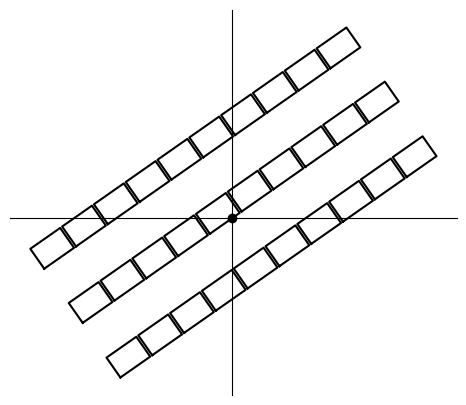

In [21]:
fig1, ax1 = plt.subplots(figsize = (10, 5))

ax1.spines['left'].set_position('zero')
ax1.spines['bottom'].set_position('zero')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.scatter(0, 0, color = 'black')

draw_a_sequence_of_shapes(ax1, map(functools.partial(tr_rotate, angle = 35), map(functools.partial(tr_translate, direction = get_directional_vector(200), distance = 8), itertools.islice(gen_rectangle(), 10))))
draw_a_sequence_of_shapes(ax1, map(functools.partial(tr_rotate, angle = 35), map(functools.partial(tr_translate, direction = get_directional_vector(180), distance = 7.5), itertools.islice(gen_rectangle(), 10))))
draw_a_sequence_of_shapes(ax1, map(functools.partial(tr_rotate, angle = 35), map(functools.partial(tr_translate, direction = get_directional_vector(160), distance = 8), itertools.islice(gen_rectangle(), 10))))

ax1.set_aspect('equal')
plt.show()

№4.2

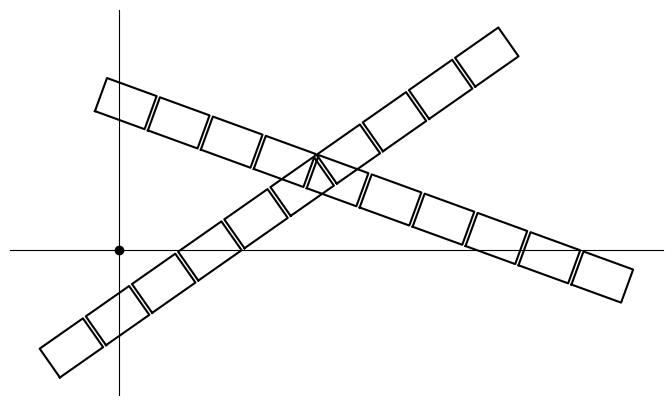

In [22]:
fig2, ax2 = plt.subplots(figsize = (10, 5))

ax2.spines['left'].set_position('zero')
ax2.spines['bottom'].set_position('zero')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.scatter(0, 0, color = 'black')

draw_a_sequence_of_shapes(ax2, map(functools.partial(tr_rotate, angle = -20), map(functools.partial(tr_translate, direction = get_directional_vector(120), distance = 4), itertools.islice(gen_rectangle(), 10))))
draw_a_sequence_of_shapes(ax2, map(functools.partial(tr_rotate, angle = 35), map(functools.partial(tr_translate, direction = get_directional_vector(210), distance = 4), itertools.islice(gen_rectangle(), 10))))

ax2.set_aspect('equal')
plt.show()

№4.3

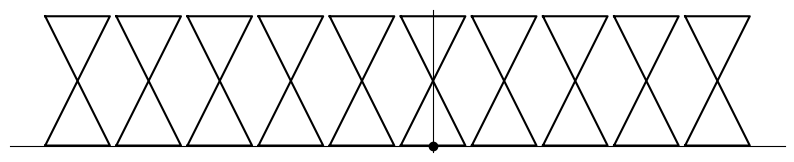

In [23]:
fig3, ax3 = plt.subplots(figsize = (10, 5))

ax3.spines['left'].set_position('zero')
ax3.spines['bottom'].set_position('zero')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.scatter(0, 0, color = 'black')

draw_a_sequence_of_shapes(ax3, map(functools.partial(tr_translate, direction = get_directional_vector(180), distance = 6), map(tr_symmetry, itertools.islice(gen_triangle(), 10))))
draw_a_sequence_of_shapes(ax3, map(functools.partial(tr_translate, direction = get_directional_vector(180), distance = 6), itertools.islice(gen_triangle(), 10)))


ax3.set_aspect('equal')
plt.show()

№4.4

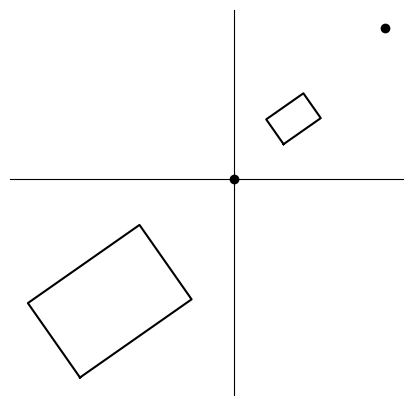

In [25]:
fig4, ax4 = plt.subplots(figsize = (10, 5))

ax4.spines['left'].set_position('zero')
ax4.spines['bottom'].set_position('zero')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_xticks([])
ax4.set_yticks([])
ax4.scatter(0, 0, color = 'black')
ax4.scatter(5, 5, color = 'black')

draw_a_sequence_of_shapes(ax4, map(functools.partial(tr_homothety, origin = (5, 5), k = 3), map(functools.partial(tr_rotate, angle = 35), map(functools.partial(tr_translate, direction = get_directional_vector(0), distance = 2), itertools.islice(gen_rectangle(), 1)))))
draw_a_sequence_of_shapes(ax4, map(functools.partial(tr_rotate, angle = 35), map(functools.partial(tr_translate, direction = get_directional_vector(0), distance = 2), itertools.islice(gen_rectangle(), 1))))

ax4.set_aspect('equal')
plt.show()

№5.1

In [26]:

def fit_convex_polygons(polygon):
    dir = 0
    for vi in range(len(polygon) - 2):
        v1 = tuple(map(lambda x, y : x - y, polygon[vi + 1], polygon[vi]))
        v2 = tuple(map(lambda x, y : x - y, polygon[vi + 2], polygon[vi + 1]))

        cross_prod = v1[0] * v2[1] - v1[1] * v2[0]

        if dir == 0:
            dir = 1 if cross_prod > 0 else -1
        elif (dir < 0 and cross_prod > 0) or(dir > 0 and cross_prod < 0):
            return False

    return True


In [27]:
((0.15, 0), (0.85, 0), (1, 0.85), (0.5, 0.5), (0, 0.85))

((0, 0), (1.5, 0), (1.5, 1), (0, 1))

((0, 0.25), (0.5, 0), (1, 0.25), (1, 0.75), (0.5, 1), (0, 0.75))

((0, 0), (1, 0), (0.5, 1))

((0, 0), (1, 0), (0.5, 1))

In [28]:
fit_convex_polygons(((0.15, 0), (0.85, 0), (1, 0.85), (0.5, 0.5), (0, 0.85))), fit_convex_polygons(((0, 0.25), (0.5, 0), (1, 0.25), (1, 0.75), (0.5, 1), (0, 0.75)))

(False, True)

№5.2

In [29]:

def fit_angle_point(polygon, point):
    for vertice in polygon:
        if vertice == point:
            return True
    return False


In [30]:
fit_angle_point(((0, 0.25), (0.5, 0), (1, 0.25), (1, 0.75), (0.5, 1), (0, 0.75)), (0.5, 1)), fit_angle_point(((0, 0.25), (0.5, 0), (1, 0.25), (1, 0.75), (0.5, 1), (0, 0.75)), (2, 2))

(True, False)

№5.3

In [31]:
def fit_square(polygon, required_area):
    area = sum(polygon[i][0] * polygon[i + 1][1] - polygon[i + 1][0] * polygon[i][1] for i in range(len(polygon) - 1)) * 0.5
    return area >= required_area


In [32]:
fit_square(((0, 0), (10, 0), (10, 5), (0, 5)), 45), fit_square(((0, 0), (10, 0), (10, 5), (0, 5)), 60)

(True, False)

№5.4

In [33]:
def fit_short_side(polygon, acceptable_shortest_side):
    shortest_side = min(math.sqrt((polygon[i][0] - polygon[i + 1][0]) ** 2 + (polygon[i][1] - polygon[i + 1][1]) ** 2) for i in range(len(polygon) - 1))
    return shortest_side >= acceptable_shortest_side

In [34]:
fit_short_side(((0, 0), (1, 0), (0.5, 1)), 1), fit_short_side(((0, 0), (1, 0), (0.5, 1)), 1.1)

(True, False)

№5.5

In [35]:
def fit_point_inside(polygon, point):
    if fit_convex_polygons(polygon):
        return pltpath.Path(polygon).contains_point(point)

In [36]:
fit_point_inside(((0, 0), (1.5, 0), (1.5, 1), (0, 1)), (3, 3)), fit_point_inside(((0, 0), (1.5, 0), (1.5, 1), (0, 1)), (0.5, 0.5))

(False, True)

№5.6

In [37]:
def fit_polygon_angles_inside(polygon, given_polygon):
    if fit_convex_polygons(polygon):
        for vertice in given_polygon:
            if fit_point_inside(polygon, vertice):
                return False
    return True


In [38]:
fit_polygon_angles_inside(((0, 0), (1.5, 0), (1.5, 1), (0, 1)), ((1, 1), (2.5, 1), (2.5, 2), (1, 2))), fit_polygon_angles_inside(((0, 0), (1.5, 0), (1.5, 1), (0, 1)), ((2, 2), (3.5, 2), (3.5, 3), (2, 3)))

(False, True)

№6.2

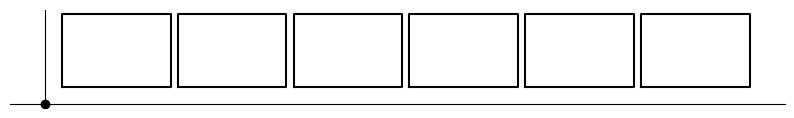

In [39]:
fig5, ax5 = plt.subplots(figsize = (10, 5))

ax5.spines['left'].set_position('zero')
ax5.spines['bottom'].set_position('zero')
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.set_xticks([])
ax5.set_yticks([])
ax5.scatter(0, 0, color = 'black')

draw_a_sequence_of_shapes(ax5, filter(functools.partial(fit_short_side, acceptable_shortest_side = 0.6), 
                                      itertools.chain(map(functools.partial(tr_homothety, origin = (-1, -1), k = 0.54), itertools.islice(gen_hexagon(), 4)),
                                      map(functools.partial(tr_homothety, origin = (-1, -1), k = 1.3), itertools.islice(gen_rectangle(), 6)), 
                                      map(functools.partial(tr_homothety, origin = (-1, -1), k = 0.43), itertools.islice(gen_concave_pentagon(), 5)))))

ax5.set_aspect('equal')
plt.show()

№6.3

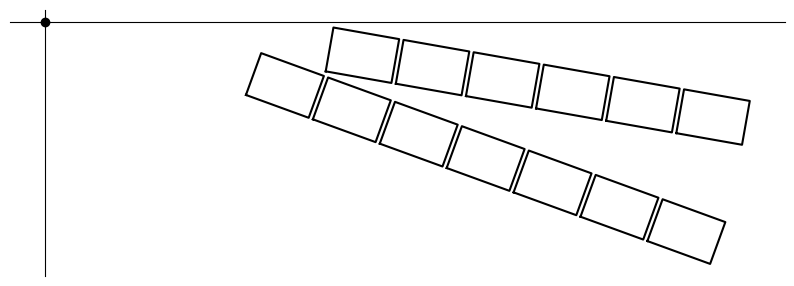

In [40]:
fig6, ax6 = plt.subplots(figsize = (10, 5))

ax6.spines['left'].set_position('zero')
ax6.spines['bottom'].set_position('zero')
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.set_xticks([])
ax6.set_yticks([])
ax6.scatter(0, 0, color = 'black')

sequence1 = map(functools.partial(tr_rotate, angle = -20), itertools.islice(gen_rectangle(), 10))
sequence2 = map(functools.partial(tr_rotate, angle = -10), itertools.islice(gen_rectangle(), 10))

for i in map(functools.partial(tr_rotate, angle = -10), itertools.islice(gen_rectangle(), 10)):
    sequence1 = filter(functools.partial(fit_polygon_angles_inside, given_polygon = i), sequence1)

for i in map(functools.partial(tr_rotate, angle = -20), itertools.islice(gen_rectangle(), 10)):
    sequence2 = filter(functools.partial(fit_polygon_angles_inside, given_polygon = i), sequence2)

draw_a_sequence_of_shapes(ax6, itertools.chain(sequence1, sequence2))

ax6.set_aspect('equal')
plt.show()

№7.1

In [62]:
def d_fit_convex_polygon(fnc):
    def wrapper(sequence):
        fnc(tuple(filter(fit_convex_polygons, sequence)))
    return wrapper

@d_fit_convex_polygon
def print_a_sequence_of_shapes_1(sequence):
    for i in sequence:
        print(i)

print_a_sequence_of_shapes_1(itertools.islice(gen_concave_pentagon(), 5))

In [64]:
def d_fit_angle_point(fnc):
    def wrapper(sequence):
        fnc(tuple(filter(functools.partial(fit_angle_point, point = (0, 0)), sequence)))
    return wrapper

@d_fit_angle_point
def print_a_sequence_of_shapes_2(sequence):
    for i in sequence:
        print(i)

print_a_sequence_of_shapes_2(itertools.islice(gen_rectangle(), 5))

((0.0, 0), (1.5, 0), (1.5, 1), (0.0, 1))


In [67]:
def d_fit_square(fnc):
    def wrapper(sequence):
        fnc(tuple(filter(functools.partial(fit_square, required_area = 1), sequence)))
    return wrapper

@d_fit_square
def print_a_sequence_of_shapes_3(sequence):
    for i in sequence:
        print(i)

print_a_sequence_of_shapes_3(itertools.islice(gen_triangle(), 5))

((1.1, 0), (2.1, 0), (1.6, 1))
((2.2, 0), (3.2, 0), (2.7, 1))
((3.3, 0), (4.3, 0), (3.8, 1))
((4.4, 0), (5.4, 0), (4.9, 1))


In [69]:
def d_fit_point_inside(fnc):
    def wrapper(sequence):
        fnc(tuple(filter(functools.partial(fit_point_inside, point = (1, 1)), sequence)))
    return wrapper

@d_fit_point_inside
def print_a_sequence_of_shapes_3(sequence):
    for i in sequence:
        print(i)

print_a_sequence_of_shapes_3(itertools.islice(gen_rectangle(), 5))

((0.0, 0), (1.5, 0), (1.5, 1), (0.0, 1))


In [72]:
def d_fit_polygon_angles_inside(fnc):
    def wrapper(sequence):
        fnc(tuple(filter(functools.partial(fit_polygon_angles_inside, given_polygon = ((0, 0), (1, 0), (1, 1), (0, 1))), sequence)))
    return wrapper

@d_fit_polygon_angles_inside
def print_a_sequence_of_shapes_4(sequence):
    for i in sequence:
        print(i)

print_a_sequence_of_shapes_4(itertools.islice(gen_rectangle(), 5))

((1.6, 0), (3.1, 0), (3.1, 1), (1.6, 1))
((3.2, 0), (4.7, 0), (4.7, 1), (3.2, 1))
((4.8, 0), (6.3, 0), (6.3, 1), (4.8, 1))
((6.4, 0), (7.9, 0), (7.9, 1), (6.4, 1))


№7.2

In [74]:
def d_tr_translate(fnc):
    def wrapper(sequence):
        fnc(tuple(map(functools.partial(tr_translate, direction = get_directional_vector(45), distance = 5), sequence)))
    return wrapper

@d_tr_translate
def print_a_sequence_of_shapes_5(sequence):
    for i in sequence:
        print(i)

print_a_sequence_of_shapes_5(itertools.islice(gen_rectangle(), 5))

((3.5355339059327378, 3.5355339059327378), (5.035533905932738, 3.5355339059327378), (5.035533905932738, 4.535533905932738), (3.5355339059327378, 4.535533905932738))
((5.135533905932737, 3.5355339059327378), (6.635533905932737, 3.5355339059327378), (6.635533905932737, 4.535533905932738), (5.135533905932737, 4.535533905932738))
((6.735533905932738, 3.5355339059327378), (8.235533905932737, 3.5355339059327378), (8.235533905932737, 4.535533905932738), (6.735533905932738, 4.535533905932738))
((8.335533905932738, 3.5355339059327378), (9.835533905932738, 3.5355339059327378), (9.835533905932738, 4.535533905932738), (8.335533905932738, 4.535533905932738))
((9.935533905932738, 3.5355339059327378), (11.435533905932738, 3.5355339059327378), (11.435533905932738, 4.535533905932738), (9.935533905932738, 4.535533905932738))


In [75]:
def d_tr_rotate(fnc):
    def wrapper(sequence):
        fnc(tuple(map(functools.partial(tr_rotate, angle = 45), sequence)))
    return wrapper

@d_tr_rotate
def print_a_sequence_of_shapes_6(sequence):
    for i in sequence:
        print(i)

print_a_sequence_of_shapes_6(itertools.islice(gen_rectangle(), 5))

[(0.0, 0.0), (1.0606601717798214, 1.0606601717798214), (0.35355339059327384, 1.7677669529663689), (-0.7071067811865476, 0.7071067811865476)]
[(1.1313708498984762, 1.1313708498984762), (2.1920310216782974, 2.1920310216782974), (1.48492424049175, 2.899137802864845), (0.4242640687119287, 1.838477631085024)]
[(2.2627416997969525, 2.2627416997969525), (3.323401871576774, 3.323401871576774), (2.6162950903902265, 4.030508652763322), (1.555634918610405, 2.9698484809835)]
[(3.394112549695428, 3.394112549695428), (4.4547727214752495, 4.4547727214752495), (3.747665940288702, 5.161879502661797), (2.6870057685088806, 4.1012193308819755)]
[(4.525483399593905, 4.525483399593905), (5.586143571373726, 5.586143571373726), (4.879036790187178, 6.293250352560274), (3.8183766184073575, 5.232590180780453)]


In [76]:
def d_tr_symmerty(fnc):
    def wrapper(sequence):
        fnc(tuple(map(functools.partial(tr_symmetry), sequence)))
    return wrapper

@d_tr_symmerty
def print_a_sequence_of_shapes_7(sequence):
    for i in sequence:
        print(i)

print_a_sequence_of_shapes_7(itertools.islice(gen_rectangle(), 5))

[(0.0, 2), (1.5, 2), (1.5, 1), (0.0, 1)]
[(1.6, 2), (3.1, 2), (3.1, 1), (1.6, 1)]
[(3.2, 2), (4.7, 2), (4.7, 1), (3.2, 1)]
[(4.8, 2), (6.3, 2), (6.3, 1), (4.8, 1)]
[(6.4, 2), (7.9, 2), (7.9, 1), (6.4, 1)]


In [80]:
def d_tr_homothety(fnc):
    def wrapper(sequence):
        fnc(tuple(map(functools.partial(tr_homothety, origin = (-1, -1), k = -2), sequence)))
    return wrapper

@d_tr_homothety
def print_a_sequence_of_shapes_8(sequence):
    for i in sequence:
        print(i)

print_a_sequence_of_shapes_8(itertools.islice(gen_rectangle(), 5))

[[-3.0, -3], [-6.0, -3], [-6.0, -5], [-3.0, -5]]
[[-6.2, -3], [-9.2, -3], [-9.2, -5], [-6.2, -5]]
[[-9.4, -3], [-12.4, -3], [-12.4, -5], [-9.4, -5]]
[[-12.6, -3], [-15.6, -3], [-15.6, -5], [-12.6, -5]]
[[-15.8, -3], [-18.8, -3], [-18.8, -5], [-15.8, -5]]


№8.1

In [41]:
def agr_origin_nearest(polygon, next_polygon):
    if type(polygon[0]) == tuple:
        dists1 = [math.sqrt(vertice[0] ** 2 + vertice[1] ** 2) for vertice in polygon]
        shrtst1 = dists1.index(min(dists1))
    else:
        shrtst1 = 0
        dists1 = [math.sqrt(polygon[0] ** 2 + polygon[1] ** 2)]
    dists2 = [math.sqrt(vertice[0] ** 2 + vertice[1] ** 2) for vertice in next_polygon]
    shrtst2 = dists2.index(min(dists2))
    if dists1[shrtst1] < dists2[shrtst2]:
        if type(polygon[0]) == tuple:
            return polygon[shrtst1]
        else:
            return polygon
    else:
        return next_polygon[shrtst2] 


In [42]:
functools.reduce(agr_origin_nearest, itertools.islice(gen_triangle(), 5))

(0.0, 0)

№8.2

In [43]:
def agr_max_side(polygon, next_polygon):
    if type(polygon) == tuple:
        return max(max(math.sqrt((polygon[i + 1][0] - polygon[i][0]) ** 2 + (polygon[i + 1][1] - polygon[i][1]) ** 2) for i in range(len(polygon) - 1)),
            max(math.sqrt((next_polygon[i + 1][0] - next_polygon[i][0]) ** 2 + (next_polygon[i + 1][1] - next_polygon[i][1]) ** 2) for i in range(len(next_polygon) - 1)))
    else:
        return (max(polygon, max(math.sqrt((next_polygon[i + 1][0] - next_polygon[i][0]) ** 2 + (next_polygon[i + 1][1] - next_polygon[i][1]) ** 2) for i in range(len(next_polygon) - 1))))

In [44]:
functools.reduce(agr_max_side, itertools.islice(gen_hexagon(), 5))

0.5590169943749475

№8.3

In [45]:
def agr_min_area(polygon, next_polygon):
    if type(polygon) == tuple:
        return min(sum(polygon[i][0] * polygon[i + 1][1] - polygon[i + 1][0] * polygon[i][1] for i in range(len(polygon) - 1)) * 0.5, 
            sum(next_polygon[i][0] * next_polygon[i + 1][1] - next_polygon[i + 1][0] * next_polygon[i][1] for i in range(len(next_polygon) - 1)) * 0.5)
    else:
        return min(polygon, sum(next_polygon[i][0] * next_polygon[i + 1][1] - next_polygon[i + 1][0] * next_polygon[i][1] for i in range(len(next_polygon) - 1)) * 0.5)

In [46]:
functools.reduce(agr_min_area, itertools.islice(gen_rectangle(), 5))

1.5

№8.4

In [51]:
def agr_perimeter(polygon, next_polygon):
        if type(polygon) == tuple:
            return (sum([math.sqrt((polygon[i + 1][0] - polygon[i][0]) ** 2 + (polygon[i + 1][1] - polygon[i][1]) ** 2) for i in range(len(polygon) - 1)]) +
                sum([math.sqrt((next_polygon[i + 1][0] - next_polygon[i][0]) ** 2 + (next_polygon[i + 1][1] - next_polygon[i][1]) ** 2) for i in range(len(next_polygon) - 1)]))
        else:
            return polygon + sum([math.sqrt((next_polygon[i + 1][0] - next_polygon[i][0]) ** 2 + (next_polygon[i + 1][1] - next_polygon[i][1]) ** 2) for i in range(len(next_polygon) - 1)])

In [54]:
functools.reduce(agr_perimeter, itertools.islice(gen_rectangle(), 4))

16.0

№8.5

In [53]:
def agr_area(polygon, next_polygon):
    if type(polygon) == tuple:
            return (sum(polygon[i][0] * polygon[i + 1][1] - polygon[i + 1][0] * polygon[i][1] for i in range(len(polygon) - 1)) * 0.5 +
                sum(next_polygon[i][0] * next_polygon[i + 1][1] - next_polygon[i + 1][0] * next_polygon[i][1] for i in range(len(next_polygon) - 1)) * 0.5)
    else:
        return polygon + sum([math.sqrt((next_polygon[i + 1][0] - next_polygon[i][0]) ** 2 + (next_polygon[i + 1][1] - next_polygon[i][1]) ** 2) for i in range(len(next_polygon) - 1)])

In [55]:
functools.reduce(agr_area, itertools.islice(gen_rectangle(), 5))

15.8